# Neuroimaging data and file structures

In [1]:
import numpy as np
import nibabel as nib
from nilearn.datasets import fetch_atlas_difumo
from nilearn import plotting

## 1-Fetch the 64 Parcellation Image, Extract, Binarize, Save as New NIfTI

In [2]:
# Fetch the atlas with 64 regions
atlas = fetch_atlas_difumo(dimension=64)
atlas_filename = atlas['maps']

# Load the atlas image
atlas_img = nib.load(atlas_filename)
atlas_data = atlas_img.get_fdata()

# Verify the atlas data
print("Atlas shape:", atlas_data.shape)

# Extract the 16th volume (15th index in 0-indexed Python)
region_16_data = atlas_data[:, :, :, 15]

# Binarize the data by setting a threshold, for example, anything greater than zero
binary_region_16_data = (region_16_data > 0).astype(np.int16)

# Check if the binarized data is not empty
print("Sum of binarized data:", np.sum(binary_region_16_data))
if np.sum(binary_region_16_data) == 0:
    raise ValueError("The binarized data is empty, indicating no non-zero values were found.")

# Save the binarized data as a new NIfTI image
binary_region_16_img = nib.Nifti1Image(binary_region_16_data, affine=atlas_img.affine)
nib.save(binary_region_16_img, 'binary_region_16.nii.gz')

Atlas shape: (104, 123, 104, 64)
Sum of binarized data: 3412


## 2-View the New NIfTI File in Three Different Views

Binarized image shape: (104, 123, 104)


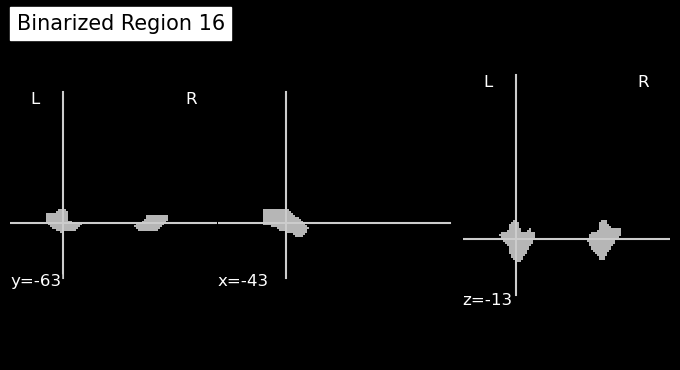

In [3]:
# Load the binarized image
binarized_img = nib.load('binary_region_16.nii.gz')

# Verify the dimensionality of the image
print("Binarized image shape:", binarized_img.shape)

# Plot the image in three views
plotting.plot_anat(binarized_img, title="Binarized Region 16", display_mode='ortho')
plotting.show()

## 3-Conceptual Differences Between Array and Array Proxy Images

Array images and array proxy images are two methods of handling neuroimaging data in NiBabel.

- **Array Images**: These images load the entire data array into memory. This provides immediate access to all the data, which is useful for operations requiring the full dataset. However, it can be memory-intensive and impractical for very large datasets, especially if system memory is limited.

- **Array Proxy Images**: These images use a proxy object to reference the data, which is not loaded into memory immediately. Instead, data is read from the disk as needed. This approach is memory-efficient and beneficial for handling large datasets, but accessing the data can be slower due to disk read operations.

In summary, array images are suitable when memory is abundant and quick data access is needed, while array proxy images are ideal for efficiently managing large datasets with limited memory resources.